# Analyzing exam scores

## 📖 Background
Client is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Let's analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Reading in the data
df = pd.read_csv('data/exams.csv')

# Take a look at the first datapoints
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.isnull().sum()

gender                    0
race/ethnicity            0
parent_education_level    0
lunch                     0
test_prep_course          0
math                      0
reading                   0
writing                   0
dtype: int64

## What are the average reading scores for students with/without the test preparation course?

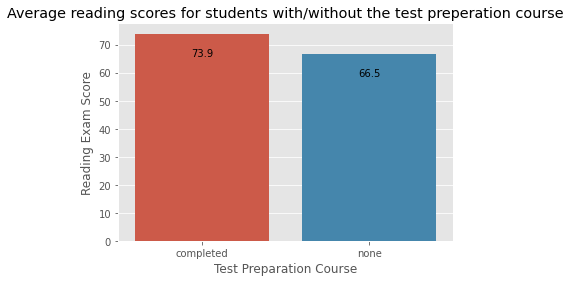

In [6]:

avg_reading_scores = df.groupby(['test_prep_course']).mean()['reading'].reset_index()
ax = sns.barplot(data=avg_reading_scores, x='test_prep_course', y='reading')
ax.set_title('Average reading scores for students with/without the test preperation course')
ax.set_ylabel('Reading Exam Score')
ax.set_xlabel('Test Preparation Course')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()-10), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

### Observation
Students that completed the test preperation course on average scored higher on the reading exam compared to students who didn't.

## What are the average scores for the different parental education levels?

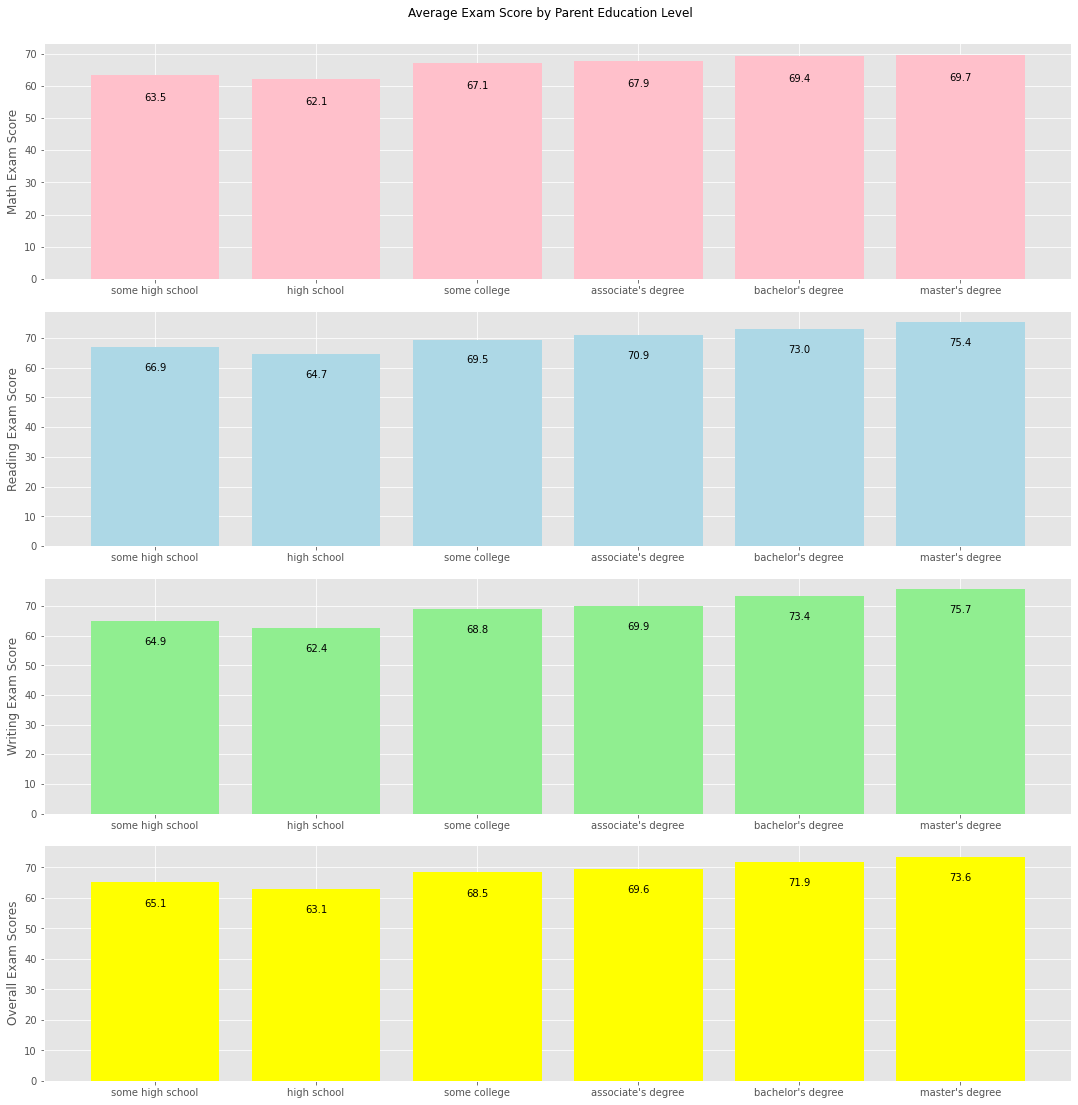

In [7]:
# Aggregate all 3 exams together
df['all_exams'] = df[['math', 'reading', 'writing']].mean(axis=1)

avg_scores_by_parent_edu = df.groupby(['parent_education_level']).mean()

# Sort index by ascending Education Level
sort_edu_level = {"some high school": 0, "high school": 1, "some college": 2, "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5}
avg_scores_by_parent_edu.sort_index(key=lambda x: x.map(sort_edu_level), inplace=True)

fig, axs = plt.subplots(4, 1, figsize=(15,15))
fig.tight_layout()
axs[0].bar(avg_scores_by_parent_edu.index, avg_scores_by_parent_edu['math'], color='pink', label='math')
axs[0].set_ylabel('Math Exam Score')
axs[1].bar(avg_scores_by_parent_edu.index, avg_scores_by_parent_edu['reading'], color='lightblue', label='reading')
axs[1].set_ylabel('Reading Exam Score')
axs[2].bar(avg_scores_by_parent_edu.index, avg_scores_by_parent_edu['writing'], color='lightgreen', label='writing')
axs[2].set_ylabel('Writing Exam Score')
axs[3].bar(avg_scores_by_parent_edu.index, avg_scores_by_parent_edu['all_exams'], color='yellow', label='all_exams')
axs[3].set_ylabel('Overall Exam Scores')
fig.suptitle('Average Exam Score by Parent Education Level', y=1.02)

for ax in axs:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()-10), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
plt.show()

### Observation
Overall, there is a positive trend between average exam scores and parental education levels, where a higher education level means a high exam score. <br>
Assuming that `some high school` means that the parent didn't graduate high school: the average scores for `high school` is an outlier to this trend, because it is lower than `some high school`.

## Average scores for students with/without the test preparation course for different parental education levels

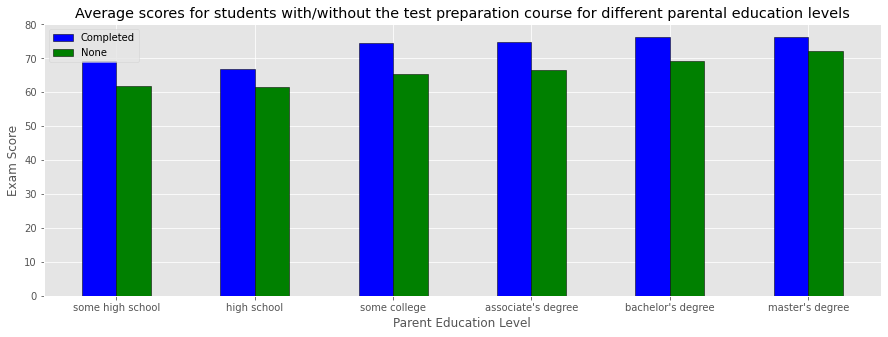

In [8]:
# Aggregate all 3 exams together
df['all_exams'] = df[['math', 'reading', 'writing']].mean(axis=1)

# Split by whether copmleted Test Prep Course
completed = df.test_prep_course == 'completed'
avg_scores_by_parent_edu_completed = df[completed].groupby(['parent_education_level']).mean()
avg_scores_by_parent_edu_no_prep = df[~completed].groupby(['parent_education_level']).mean()

# Sort index by ascending Education Level
sort_edu_level = {"some high school": 0, "high school": 1, "some college": 2, "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5}
avg_scores_by_parent_edu_completed.sort_index(key=lambda x: x.map(sort_edu_level), inplace=True)
avg_scores_by_parent_edu_no_prep.sort_index(key=lambda x: x.map(sort_edu_level), inplace=True)


N = 6
ind = np.arange(N) 
width = 0.25

plt.figure(figsize=(15,5))
plt.bar(ind, avg_scores_by_parent_edu_completed['all_exams'], color = 'b',
        width = width, edgecolor = 'black',
        label='Completed')
plt.bar(ind+width, avg_scores_by_parent_edu_no_prep['all_exams'], color = 'g',
        width = width, edgecolor = 'black',
        label='None')

plt.xticks(ind + width/2, avg_scores_by_parent_edu.index)
plt.xlabel('Parent Education Level')
plt.ylabel('Exam Score')
plt.title('Average scores for students with/without the test preparation course for different parental education levels')
plt.legend()
plt.show()

### Observation
Across all parental education levels, students that completed the test preparation course on average scored higher on the exams compared to students that didn't.

## If kids who perform well on one subject also score well on the others

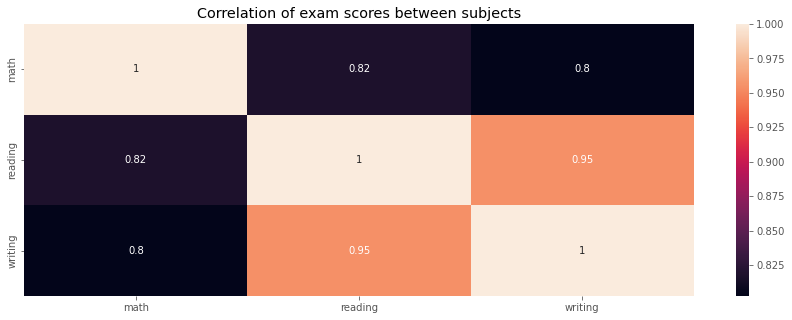

In [9]:
plt.figure(figsize=(15,5))
sns.heatmap(df[['math', 'reading', 'writing']].corr(), annot=True)
plt.title('Correlation of exam scores between subjects')
plt.show()

### Observation
There is strong positive correlations between students that well on one subject and others. <br>
Particularly, there is a high `0.95` correlation between scoring well on the reading and writing exam, likely because they are closely related subjects.

## Summary
The average reading scores for students with the test prepartion course: 73.9. <br>
The average reading scores for students without the test prepartion course: 66.5. <br>

The positive relationship between average exam score and parental education levels.

Across all parental education levels, students that completed the test preparation course on average scored higher on the exams compared to students that didn't.

There is strong positive correlations between students that well on one subject and others.